In [1]:
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np

sys.path.append("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/")
from src.dataset.dataset import SimpleIterDataset
from src.utils.train_utils import to_filelist
from torch.utils.data import DataLoader
#import dgl  # CPU only version for now
from tqdm import tqdm
from torch_scatter import scatter_sum
import matplotlib.pyplot as plt
import pickle
import numpy as np
import mplhep as hep


hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=13)


/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
dic_bp = np.load("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/data_creation/condor_background_IDEA/background_particles.npy", allow_pickle=True).item()

In [16]:
dic_bp["p"]

array([5.74947936e-03, 3.67210418e-05, 3.71818738e-05, 3.48091248e-05,
       3.47280835e-05, 1.09912550e-04, 8.28659873e-05, 1.24879961e-04,
       4.92093449e-05, 1.34409340e-04, 4.74535998e-05, 4.52436963e-05,
       5.33080424e-05, 9.15396599e-05, 1.09241169e-04, 7.35580243e-05,
       8.00580725e-05, 3.56423456e-05, 3.47632089e-05, 7.97504092e-05,
       3.22649353e-05, 4.01176140e-05, 3.55627510e-05, 3.51066833e-05,
       1.25639934e-03, 3.72689722e-05, 4.29314204e-05, 4.49462770e-05,
       6.75673669e-05, 3.70417863e-05, 4.11961454e-05, 5.44733520e-05,
       3.87068622e-05, 5.42324510e-05, 5.00433597e-05, 4.04559209e-05,
       3.89786866e-05, 1.69555724e-04, 4.25824676e-05, 4.13146637e-05,
       1.44721524e-04, 6.03057574e-05, 3.70935793e-05, 3.26073930e-05,
       3.55556453e-05, 4.18895721e-05, 4.63374129e-05, 3.50869724e-05,
       1.39403178e-02, 1.12907560e-02, 1.08209920e-02, 2.43296488e-02,
       1.82941085e-02, 4.29379245e-02, 2.35821859e-02, 1.78354100e-03,
      

Text(1, 0, 'p [Gev]')

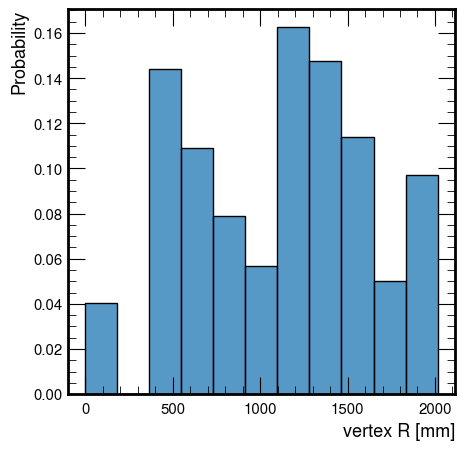

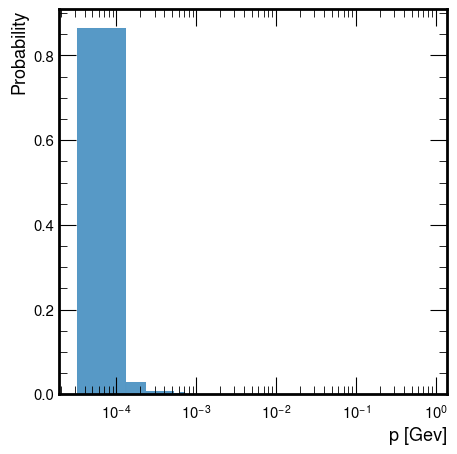

In [21]:
# for detector information check:
# https://indico.cern.ch/event/932973/contributions/4041314/attachments/2139657/3664808/primavera_FCCworkshop_2020.pdf
# The inner radius of the DC is at 35 cm 
import seaborn as sns
plt.figure(figsize=(5,5))
sns.histplot(dic_bp["R"]*1e3, stat="probability")
plt.xlabel("vertex R [mm]")


plt.figure(figsize=(5,5))
sns.histplot(dic_bp["p"], stat="probability", binwidth=0.0001)
plt.xscale("log")
plt.xlabel("p [Gev]")

In [25]:
# particles created in the DC:
mask_particles_created_inDC = (dic_bp["R"]*1e3)>350
dic_bp["pz"][mask_particles_created_inDC]

array([ 1.76349844e-05, -2.75046535e-05, -2.34247570e-06,  9.33655934e-06,
        4.35294251e-06,  5.07040180e-05,  1.73440089e-05, -3.02105275e-05,
       -2.44239708e-05,  9.12673269e-06, -3.38008520e-05, -2.31907944e-05,
        5.55875213e-05, -7.68003403e-05, -3.13499563e-05,  3.08449961e-05,
        2.19508587e-05, -4.65870281e-06, -4.93083698e-05,  2.30518776e-05,
       -2.61237519e-05,  2.71996704e-05, -2.03673709e-05,  6.51679946e-05,
        1.59619529e-05, -2.07701025e-05,  1.56571080e-05,  2.81067997e-05,
        3.71708999e-06,  4.51028038e-06, -4.99695386e-05, -3.07126221e-05,
       -5.06804090e-05,  2.18179143e-05, -2.88494916e-05,  3.66881479e-05,
       -1.26736964e-04, -1.24899426e-05,  1.36359361e-05,  1.41093488e-05,
        1.78644601e-05, -6.38479416e-06, -2.16408191e-06,  1.33908190e-05,
       -1.02063250e-05, -7.39628409e-07, -1.98488756e-05,  7.97594726e-04,
        9.46153894e-03, -8.97216322e-04,  7.63348344e-06,  6.78852029e-07,
        1.78252210e-06,  

/eos/experiment/fcc/ee/datasets/DC_tracking/Pythia/gun_fakeCalo_g1/reco_gun_1000.root